In [1]:
! pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 37.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 53.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=1c2c6b376b8d2b0425e7de45458d25a23d645067923ba5cc7daa63721b31c2a3
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    

In [1]:
from ISLP import load_data
default = load_data('Default')
default.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [8]:
import pandas as pd

# Creating a DataFrame with 3 different string values in two columns
df = pd.DataFrame({
    'Column1': ['String1', 'String2', 'String3'],
    'Column2': ['StringA', 'StringB', 'StringC']
})

df

,Column1,Column2
0,String1,StringA
1,String2,StringB
2,String3,StringC


In [18]:
# assign mappings
mapping = {"String1": 1, "String2": 0, "String3": 0}

df['Column1'].map(mapping)

0    1
1    0
2    0
Name: Column1, dtype: int64

In [20]:
df['Column1'].value_counts()

String1    1
String2    1
String3    1
Name: Column1, dtype: int64

In [21]:
set(df['Column1'])

{'String1', 'String2', 'String3'}

In [17]:
# assign all strings not "String1" to 0 and if they're "String1" to 1
[1 if x == "StringA" else 0 for x in df['Column2']]

[1, 0, 0]

In [22]:
mapping = {"No": 0, "Yes": 1}

default['default'] = default['default'].map(mapping)
default['student'] = default['student'].map(mapping)

In [25]:
default['balance_sqrd'] = default['balance']**2

In [34]:
copy = default.iloc[:500, :]

In [44]:
#histogram

import altair as alt
(alt.Chart(copy)
  .mark_point()
  .encode(x='balance',
          y='income',
    )
)

alt.Chart(...)

<Axes: xlabel='balance', ylabel='Count'>

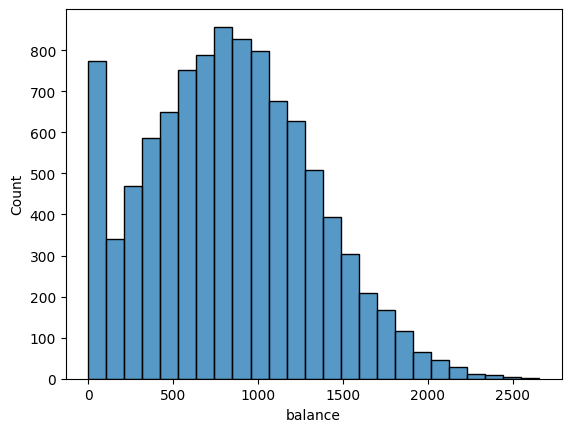

In [41]:
import seaborn as sns

sns.histplot(data=default, x='balance', bins=25)

In [26]:
from sklearn.model_selection import train_test_split

X = default[['student', 'default', 'balance', 'balance_sqrd']]
y = default['income']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.05,
                                                    shuffle=True,
                                                    random_state=589)

In [27]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

ols = sm.OLS(y_train, X_train).fit()

In [29]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     3111.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:57:49   Log-Likelihood:                -99742.
No. Observations:                9500   AIC:                         1.995e+05
Df Residuals:                    9495   BIC:                         1.995e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.009e+04    253.924    157.893   